# Upper Confidence Bounds


## Import Libraries


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset


In [8]:
dataset = pd.read_csv("../datasets/10_ads_ctr_optimisation.csv")

## Implementing UCB


In [9]:
import math

N = len(dataset.values)
d = 10
ads_selected = []
number_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if number_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3 / 2 * math.log(n + 1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

## Visualising the Results


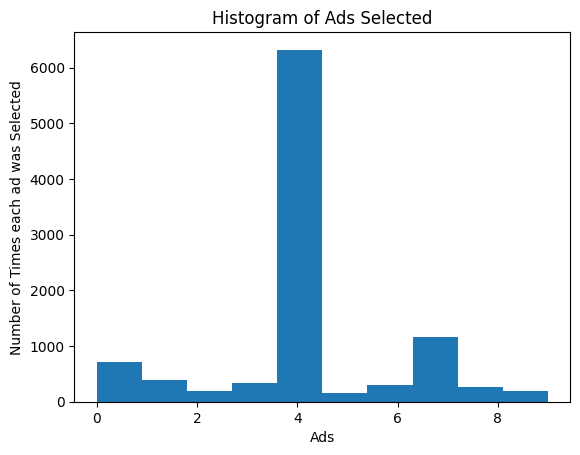

In [10]:
plt.hist(ads_selected)
plt.title("Histogram of Ads Selected")
plt.xlabel("Ads")
plt.ylabel("Number of Times each ad was Selected")
plt.show()